 # <center>  LAB2 - METODA NAJMNIEJSZYCH KWADRATÓW </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 

## Zadanie 1





Celem zadania jest zastosowanie metody najmniejszych kwadratów do predykcji, czy nowotwór jest złośliwy (ang. malignant) czy łagodny (ang. benign) .Nowotwory złośliwe i łagodne mają różne charakterystyki wzrostu. Istotne cechy to m. in. promień i tekstura. Charakterystyki te wyznaczane są poprzez
diagnostykę obrazową i biopsje.


<div align="center">
    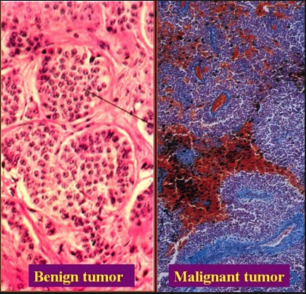
</div>
<br>


Do rozwiązania problemu wykorzystamy bibliotekę pandas, typ DataFrame oraz
dwa zbiory danych:


- *breast-cancer-train.dat*
- *breast-cancer-validate.dat*

Nazwy kolumn znajdują się w pliku *breast-cancer.labels.* Pierwsza kolumna to identyfikator pacjenta *patient ID*. Dla każdego pacjenta wartość w
kolumnie *Malignant/Benign* wskazuje klasę, tj. czy jego nowotwór jest złośliwy
czy łagodny. Pozostałe 30 kolumn zawiera cechy, tj. charakterystyki nowotworu.

1. Otwórz zbiory *breast-cancer-train.dat* i *breast-cancer-validate.dat* używając funkcji *pd.io.parsers.read* csv z biblioteki pandas.
2. Stwórz histogram i wykres wybranej kolumny danych przy pomocy funkcji hist oraz plot. Pamiętaj o podpisaniu osi i wykresów.
3. Stwórz reprezentacje danych zawartych w obu zbiorach dla liniowej i kwadratowej metody najmniejszych kwadratów (łącznie 4 macierze). Dla reprezentacji kwadratowej użyj tylko podzbioru dostępnych danych, tj. danych z kolumn radius (mean), perimeter (mean), area (mean), symmetry (mean).
4. Stwórz wektor b dla obu zbiorów (tablicę numpy 1D-array o rozmiarze identycznym jak rozmiar kolumny Malignant/Benign odpowiedniego zbioru danych). Elementy wektora b to 1 jeśli nowotwór jest złośliwy, -1 w przeciwnym wypadku. Funkcja np.where umożliwi zwięzłe zakodowanie wektora b.
5. Znajdź wagi dla liniowej oraz kwadratowej reprezentacji najmniejszych kwadratów przy pomocy macierzy A zbudowanych na podstawie zbioru
breast-cancer-train.dat. Potrzebny będzie także wektor b zbudowany na podstawie zbioru breast-cancer-train.dat.

Uwaga. Problem najmniejszych kwadratów należy rozwiązać stosując równanie normalne (tj. nie używając funkcji scipy.linalg.lstsq). Rozwiązując równanie normalne należy użyć funkcji solve, unikając obliczania odwrotności macierzy funkcją scipy.linalg.pinv.

7. Oblicz współczynniki uwarunkowania macierzy, $cond(A^T A)$, dla liniowej i kwadratowej metody najmniejszych kwadratów.
8. Sprawdź jak dobrze otrzymane wagi przewidują typ nowotworu (łagodny czy złośliwy). W tym celu pomnóż liniową reprezentację zbioru breast-cancer-validate.dat oraz wyliczony wektor wag dla reprezentacji liniowej. Następnie powtórz odpowiednie mnożenie dla reprezentacji kwadratowej. Zarówno dla reprezentacji liniowej jak i kwadratowej otrzymamy wektor p. Zakładamy, że jeśli p[i] > 0, to i-ta osoba (prawdopodobnie) ma nowotwór złośliwy. Jeśli p[i] ≤ 0 to i-ta osoba (prawdopodobnie) ma nowotwór łagodny. Porównaj wektory p dla reprezentacji liniowej i kwadratowej z wektorem b (użyj reguł p[i] > 0 oraz p[i] ≤ 0). Oblicz liczbę fałszywie dodatnich (ang. false-positives) oraz fałszywie ujemnych (ang. false-negatives) przypadków dla obu reprezentacji. Przypadek fałszywie dodatni zachodzi, kiedy model przewiduje nowotwór złośliwy, gdy w rzeczywistości nowotwór był łagodny. Przypadek fałszywie ujemny zachodzi, kiedy model przewiduje nowotwór łagodny, gdy w rzeczywistości nowotwór był złośliwy.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("breast-cancer.labels", "r") as file:
    columnNames = file.read().splitlines()

train_data = pd.io.parsers.read_csv("./breast-cancer-train.dat", names=columnNames)
validate_data = pd.io.parsers.read_csv("./breast-cancer-validate.dat", names=columnNames)
train_data.head()


,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
validate_data.head()

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,892438,M,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.61210,0.19800,0.2968,0.09929
1,892604,B,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,...,13.46,23.07,88.13,551.3,0.1050,0.2158,0.19040,0.07625,0.2685,0.07764
2,89263202,M,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,...,23.68,29.43,158.80,1696.0,0.1347,0.3391,0.49320,0.19230,0.3294,0.09469
3,892657,B,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
4,89296,B,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,...,12.68,21.61,82.69,489.8,0.1144,0.1789,0.12260,0.05509,0.2208,0.07638


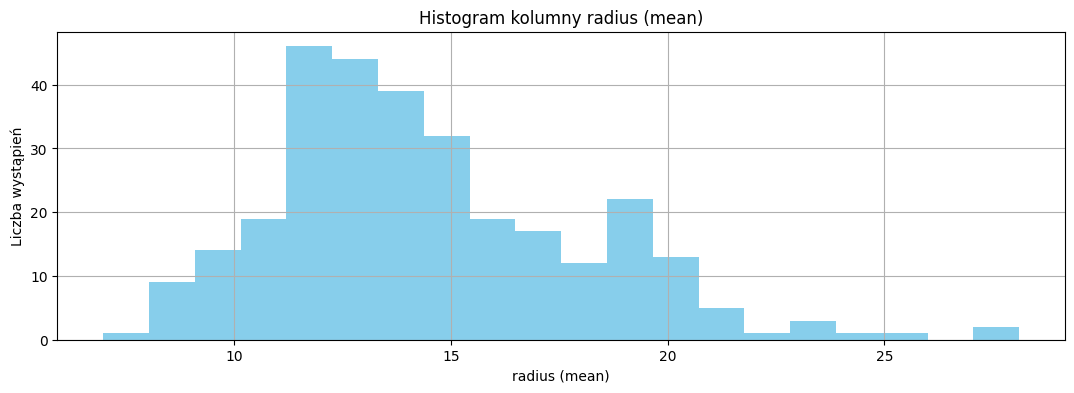

In [4]:
selected_column = 'radius (mean)'

# Tworzenie histogramu
plt.figure(figsize=(13, 4))
plt.hist(train_data[selected_column], bins=20, color='skyblue')
plt.title(f'Histogram kolumny {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Liczba wystąpień')
plt.grid(True)
plt.show()



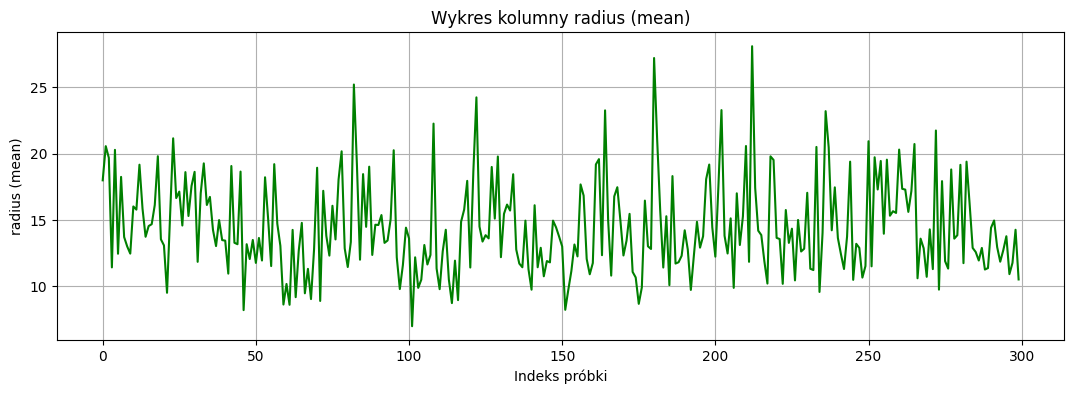

In [5]:
plt.figure(figsize=(13, 4))
plt.plot(train_data[selected_column], color='green')
plt.title(f'Wykres kolumny {selected_column}')
plt.xlabel('Indeks próbki')
plt.ylabel(selected_column)
plt.grid(True)
plt.show()

In [6]:
selected_columns = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']

X_train_linear = train_data[selected_columns].copy()
X_train_linear = X_train_linear.to_numpy()
print(X_train_linear)



[[1.799e+01 1.228e+02 1.001e+03 2.419e-01]
 [2.057e+01 1.329e+02 1.326e+03 1.812e-01]
 [1.969e+01 1.300e+02 1.203e+03 2.069e-01]
 ...
 [1.176e+01 7.500e+01 4.311e+02 1.619e-01]
 [1.426e+01 9.122e+01 6.331e+02 1.635e-01]
 [1.051e+01 6.685e+01 3.342e+02 1.695e-01]]


In [7]:
X_train_quad = train_data[selected_columns].copy()
X_train_quad = pd.DataFrame(X_train_quad)
squared_features_linear = X_train_quad ** 2
product_features_linear = np.array([X_train_quad.iloc[:, i] * X_train_quad.iloc[:, j] for i in range(X_train_quad.shape[1])
                                    for j in range(i + 1, X_train_quad.shape[1])]).T
X_train_quad = np.hstack((X_train_quad, squared_features_linear, product_features_linear))
print(X_train_quad[0])



[1.799000e+01 1.228000e+02 1.001000e+03 2.419000e-01 3.236401e+02
 1.507984e+04 1.002001e+06 5.851561e-02 2.209172e+03 1.800799e+04
 4.351781e+00 1.229228e+05 2.970532e+01 2.421419e+02]


In [8]:
X_validate_linear = validate_data[selected_columns].copy()
X_validate_linear = X_validate_linear.to_numpy()
print(X_validate_linear)

[[1.953e+01 1.295e+02 1.217e+03 1.792e-01]
 [1.246e+01 8.043e+01 4.713e+02 1.781e-01]
 [2.009e+01 1.347e+02 1.247e+03 2.249e-01]
 ...
 [9.423e+00 5.926e+01 2.713e+02 1.742e-01]
 [1.459e+01 9.639e+01 6.571e+02 1.454e-01]
 [1.151e+01 7.452e+01 4.035e+02 1.388e-01]]


In [9]:
X_validate_quad = validate_data[selected_columns].copy()
X_validate_quad = pd.DataFrame(X_validate_quad)
squared_features_quad = X_validate_quad ** 2
product_features_quad = np.array([X_validate_quad.iloc[:, i] * X_validate_quad.iloc[:, j] for i in range(X_validate_quad.shape[1])
                                  for j in range(i + 1, X_validate_quad.shape[1])]).T
X_validate_quad = np.hstack((X_validate_quad, squared_features_quad, product_features_quad))
print(X_validate_quad[0])

[1.953000e+01 1.295000e+02 1.217000e+03 1.792000e-01 3.814209e+02
 1.677025e+04 1.481089e+06 3.211264e-02 2.529135e+03 2.376801e+04
 3.499776e+00 1.576015e+05 2.320640e+01 2.180864e+02]


In [10]:
#Wektory wyników
b_train = np.where(train_data['Malignant/Benign'] == 'M', 1, -1)
b_validate = np.where(validate_data['Malignant/Benign'] == 'M', 1, -1)

In [11]:
w_train_linear = np.linalg.solve(X_train_linear.T @ X_train_linear, X_train_linear.T @ b_train)
w_train_quad = np.linalg.solve(X_train_quad.T @ X_train_quad, X_train_quad.T @ b_train)


In [12]:
cond_linear = np.linalg.cond(X_train_linear.T @ X_train_linear)
cond_quadratic = np.linalg.cond(X_train_quad.T @ X_train_quad)

print("cond_linear: ",cond_linear, "\n cond_quadratic: ",cond_quadratic)

cond_linear:  828804275.0118532 
 cond_quadratic:  9.056816948763561e+17


In [13]:
p_linear = X_validate_linear @ w_train_linear
false_positives_linear = np.sum((p_linear > 0) & (b_validate == -1))
false_negatives_linear = np.sum((p_linear <= 0) & (b_validate == 1))


p_quad = X_validate_quad @ w_train_quad
false_positives_quad = np.sum((p_quad > 0) & (b_validate == -1))
false_negatives_quad = np.sum((p_quad <= 0) & (b_validate == 1))


print("Model liniowy:")
print(f"Fałszywie pozytywne: {false_positives_linear}, Fałszywie negatywne: {false_negatives_linear}")
print("Model kwadratowy:")
print(f"Fałszywie pozytywne: {false_positives_quad}, Fałszywie negatywne: {false_negatives_quad}")

Model liniowy:
Fałszywie pozytywne: 8, Fałszywie negatywne: 7
Model kwadratowy:
Fałszywie pozytywne: 15, Fałszywie negatywne: 5


Ogólna skuteczność: Model liniowy wydaje się być bardziej zrównoważony w kontekście błędów fałszywie pozytywnych i fałszywie negatywnych, z nieznacznie niższą łączną liczbą błędów (15) w porównaniu do modelu kwadratowego (20). To sugeruje, że w tym przypadku prostszy model może lepiej generalizować dane, co jest zgodne z zasadą braku nadmiernego dopasowania (ang. overfitting).

Specyfika błędów: Model kwadratowy ma znacznie więcej fałszywie pozytywnych wyników niż model liniowy, ale mniej fałszywie negatywnych. Wskazuje to na to, że model kwadratowy ma tendencję do bycia "zbyt optymistycznym" w przewidywaniu pozytywnych klas, co może być problematyczne w zależności od konsekwencji błędnych klasyfikacji w danym zastosowaniu. W naszym przypadku(medycznym) lepiej kiedy wyjdzie częściej pesymistyczna opcjam czyli fałszywie pozytywny, bo wtedy jest lepsza szansa na szybką ingerecję.

Kompleksowość modelu: Wyniki te również sugerują, że zwiększenie złożoności modelu (przejście z liniowego do kwadratowego) nie zawsze prowadzi do lepszych wyników. Zwiększenie złożoności może prowadzić do nadmiernego dopasowania, szczególnie gdy dostępna jest ograniczona ilość danych do nauki.